In [1]:
from ai_camera import AICamera
import os
import modi
import time

Running PyMODI (v0.9.2)


In [2]:
# gathering image data to each labeled folder
def gathering(path,cam,btn):
    # check latest file index
    try: # if dir is not empty, file idx continue
        flist = os.listdir(path)
        paths = [os.path.join(path, basename) for basename in flist]
        latest = max(paths, key=os.path.getctime) # latest file
        latest = os.path.basename(latest)
        latest = int(os.path.splitext(latest)[0]) # latest file idx num
        idx = latest +1
        
    except: # if dir is empty, first file idx is 1
        idx = 1
    print('확인')
    while cam.is_opened():
        frame = cam.read()
        cam.show(frame) # streaming camera
        
#         c = cv2.waitKey(1)
#         if c == ord('q'):
#             camera.release()
#             cv2.destroyAllWindows()
#             break
        
#         elif c == ord('c'):
            
#             imgpath = path + '/' + str(idx) + '.jpg'
#             print(imgpath)
#             cv2.imwrite(imgpath,frame)
#             print('image saved')
#             idx += 1
        if btn.clicked:
            imgpath = path + '/' + str(idx) + '.jpg'
            print(imgpath)
            cam.imwrite(imgpath,frame)
            print('image saved')
            idx += 1
            time.sleep(0.1)
        time.sleep(0.1)
            

        
#check and make directory labeled
def check_dir(path,label):
    path = os.path.join(path,label)
    print("Image Data Path : " + path)
    if os.path.isdir(path):
        pass
    else:
        os.mkdir(path)
    return path

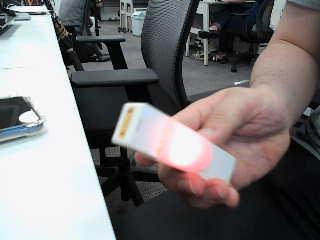

Run Can Task.
Start initializing connected MODI modules
Your MODI module(s) is not up-to-date.
You can update your MODI modules by calling 'update_module_firmware()'
Motor (1594) has been connected!
Button (1431) has been connected!
type label name : test_red
Image Data Path : ../data/test_red
확인


In [ ]:
cam = AICamera()
cam.set_window()
bundle = modi.MODI()
btn = bundle.buttons[0]
while True:
    path = '../data/'
    label = input('type label name : ')
    path = check_dir(path,label)
    gathering(path,cam,btn)